Unnormalised background array = [101, 7, 21, 9, 64]
Normalised background array = [34, 2, 7, 3, 21]
Total number of particles (without background counts) =  [352, 251, 187, 159, 111, 97]
Number of alpha particles (without background counts) =  [62, 36, 22, 19, 10, 8]
Number of electons (without background counts) =  [128, 104, 71, 52, 44, 35]
Number of mouns (without background counts) =  [26, 15, 14, 13, 12, 7]
Number of dots (without background counts) =  [137, 97, 81, 76, 46, 48]


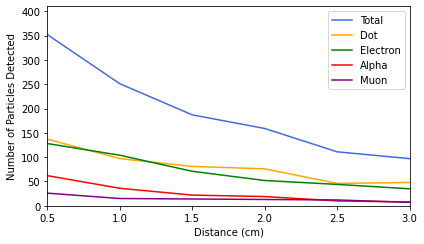

In [2]:
############################################################################
# data (no. of particles detected) is written in from looking at the spectra tab in Pixet
# background data is normalised from 30 minutes to 10 minutes worth of data
# plots the number of aprticles against distance
############################################################################

import matplotlib.pyplot as plt

# number of particles at each distance, the values in each array line up with the position in the x_arry which is the distance (i.e. the first value in each array was taken at 0.5 cm)
# x=distance, t=total, a=alpha, e=electron, m=muon, d=dot
x_array = [0.5,1.0,1.5,2.0,2.5,3.0]
t_array = [386,285,221,193,145,131]
a_array = [ 64, 38, 24, 21, 12, 10]
e_array = [135,111, 78, 59, 51, 42]
m_array = [ 29, 18, 17, 16, 15, 10]
d_array = [158,118,102, 97, 67, 69]
bkg_arr = [101,  7, 21,  9, 64] # total, alpha, electrons, muons, dots

# The background values were taken over 30 minutes compared to 10 minutes for the other values, so the background values need to be normalised
norm = 3
print("Unnormalised background array =", bkg_arr)
norm_bkg_arr = [i/norm for i in bkg_arr]
#print(norm_bkg_arr)
bkg_arr = [int(round(i)) for i in norm_bkg_arr]
print("Normalised background array =", bkg_arr)

# Takeaway the background values form the measured arrays
new_t_array = [i-bkg_arr[0] for i in t_array]
new_a_array = [i-bkg_arr[1] for i in a_array]
new_e_array = [i-bkg_arr[2] for i in e_array]
new_m_array = [i-bkg_arr[3] for i in m_array]
new_d_array = [i-bkg_arr[4] for i in d_array]

# Print the new values after the backgound count has been removed
print("Total number of particles (without background counts) = ", new_t_array)
print("Number of alpha particles (without background counts) = ", new_a_array)
print("Number of electons (without background counts) = ", new_e_array)
print("Number of mouns (without background counts) = ", new_m_array)
print("Number of dots (without background counts) = ", new_d_array)

# setup for plotting
particle_list = [new_t_array, new_d_array, new_e_array, new_a_array, new_m_array]
lab = ["Total","Dot","Electron","Alpha","Muon"]
col = ["royalblue","orange","green","red","purple"]

# plotting data
plt.figure(figsize=(6,3.5))
for z in range(len(particle_list)):
    plt.plot(x_array, particle_list[z], label=lab[z], color=col[z])

plt.xlim(0.5,3)
plt.ylim(0,410)
plt.xlabel("Distance (cm)")
plt.ylabel("Number of Particles Detected")
plt.legend(loc="upper right")
#plt.title("Based on Time")
plt.tight_layout()

plt.savefig("Distance Graph.jpg", dpi=200, bbox_inches='tight',pad_inches = 0)

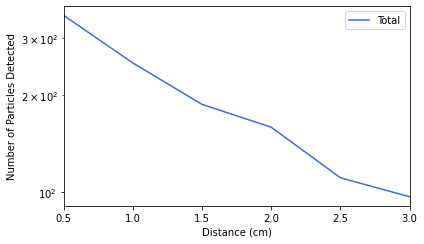

In [3]:
# plots total number on a logarithmic scale
plt.figure(figsize=(6,3.5))
plt.plot(x_array, new_t_array, label="Total", color="royalblue")

plt.xlim(0.5,3)
plt.xlabel("Distance (cm)")
plt.ylabel("Number of Particles Detected")
plt.legend(loc="upper right")
plt.yscale("log")
plt.tight_layout()

plt.savefig("Total Graph.jpg", dpi=200, bbox_inches='tight',pad_inches = 0)